Root Mean Squared Error: 8.04


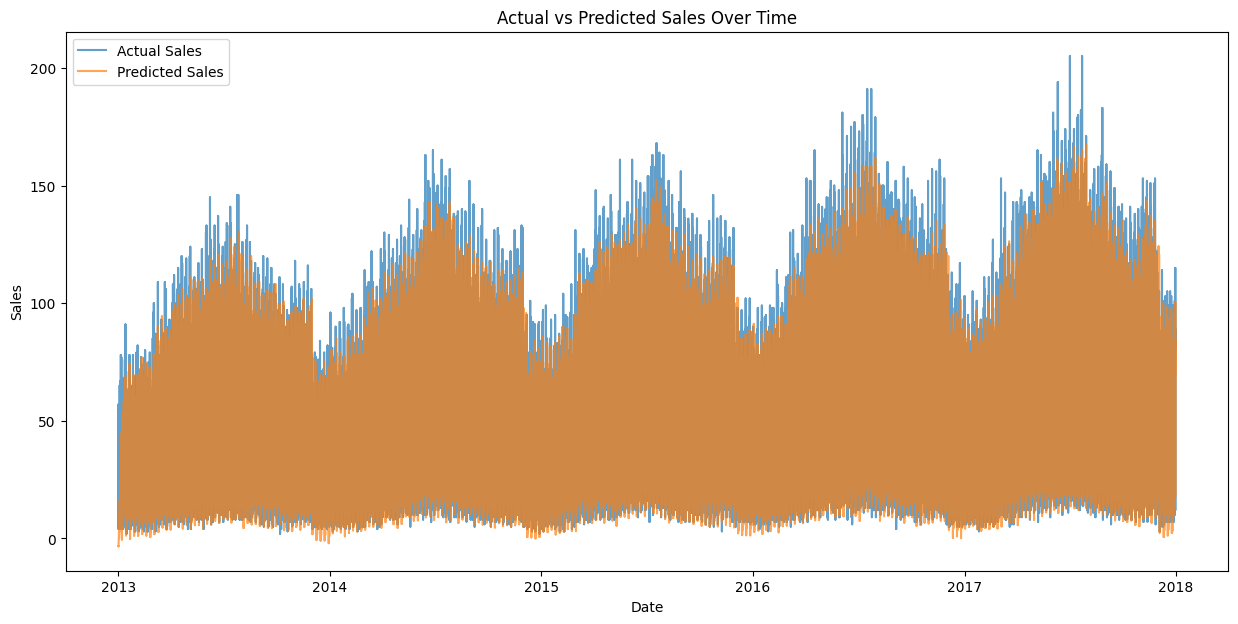

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Added for visualization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv('/content/train.csv')

# Step 1: Data Preprocessing
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.dayofweek
df['day_of_year'] = df['date'].dt.dayofyear
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['season'] = df['month'] % 12 // 3 + 1

# Step 2: Create lag features (past seven days' sales)
for i in range(1, 8):
    df[f'lag_{i}'] = df.groupby(['store', 'item'])['sales'].shift(i)

# Step 3: Fill missing values
df.fillna(0, inplace=True)

# Step 4: Define input and output features
lag_features = [f'lag_{i}' for i in range(1, 8)]
X = df[['store', 'item', 'day_of_week', 'day_of_year', 'month', 'year', 'season'] + lag_features]
y = df['sales']

# Split the data into train and test sets (avoid shuffling for time series data)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Step 5: Build the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Step 6: Train the model
pipeline.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = pipeline.predict(X_test)

# Step 8: Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse:.2f}')

# Step 9: Visualization of actual vs predicted values

# Create a DataFrame with actual and predicted values
results = X_test.copy()
results['Actual_Sales'] = y_test.values
results['Predicted_Sales'] = y_pred
results['date'] = df.loc[y_test.index, 'date']

# Sort the results by date
results.sort_values('date', inplace=True)

# Plot the actual vs predicted sales
plt.figure(figsize=(15, 7))
plt.plot(results['date'], results['Actual_Sales'], label='Actual Sales', alpha=0.7)
plt.plot(results['date'], results['Predicted_Sales'], label='Predicted Sales', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales Over Time')
plt.legend()
plt.show()


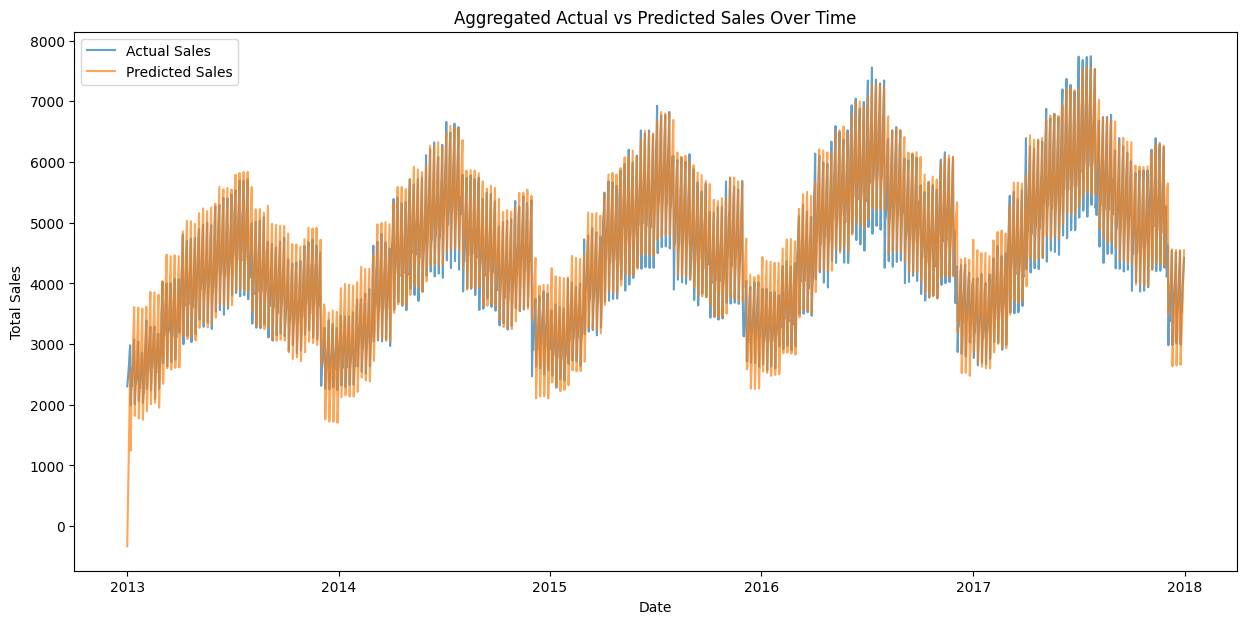

In [ ]:
# Aggregate actual and predicted sales by date
aggregated_results = results.groupby('date').agg({
    'Actual_Sales': 'sum',
    'Predicted_Sales': 'sum'
}).reset_index()

# Plot the aggregated actual vs predicted sales
plt.figure(figsize=(15, 7))
plt.plot(aggregated_results['date'], aggregated_results['Actual_Sales'], label='Actual Sales', alpha=0.7)
plt.plot(aggregated_results['date'], aggregated_results['Predicted_Sales'], label='Predicted Sales', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Aggregated Actual vs Predicted Sales Over Time')
plt.legend()
plt.show()


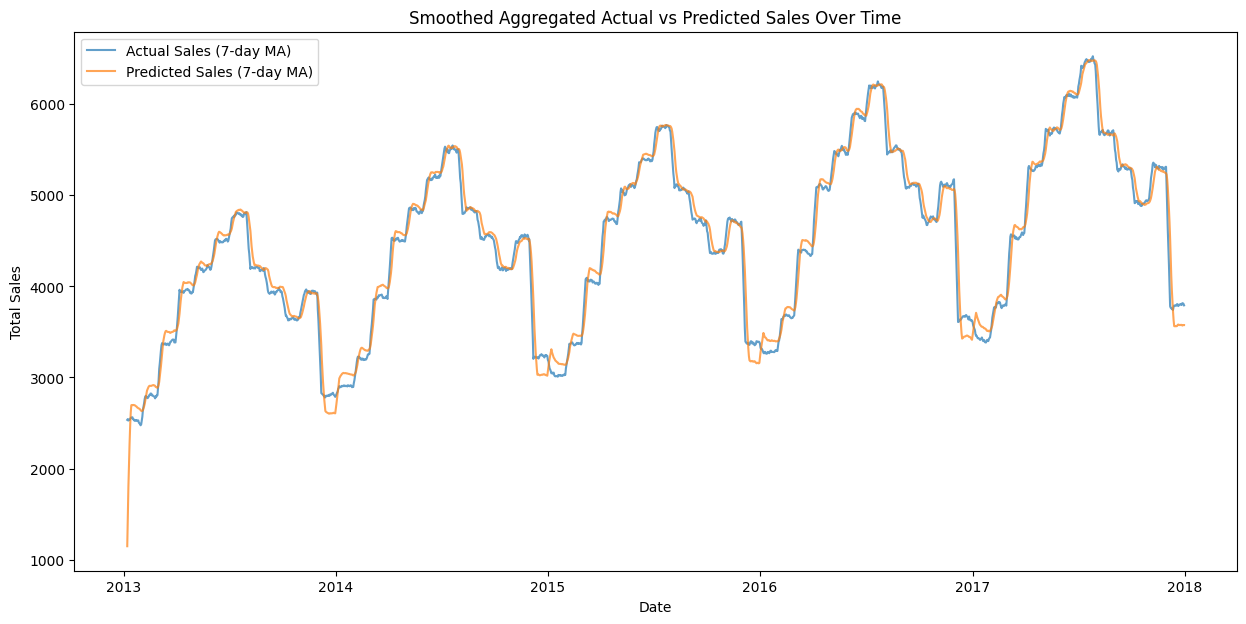

In [ ]:
# Apply a 7-day rolling average
aggregated_results['Actual_Sales_Smooth'] = aggregated_results['Actual_Sales'].rolling(window=7).mean()
aggregated_results['Predicted_Sales_Smooth'] = aggregated_results['Predicted_Sales'].rolling(window=7).mean()

# Plot the smoothed actual vs predicted sales
plt.figure(figsize=(15, 7))
plt.plot(aggregated_results['date'], aggregated_results['Actual_Sales_Smooth'], label='Actual Sales (7-day MA)', alpha=0.7)
plt.plot(aggregated_results['date'], aggregated_results['Predicted_Sales_Smooth'], label='Predicted Sales (7-day MA)', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Smoothed Aggregated Actual vs Predicted Sales Over Time')
plt.legend()
plt.show()


In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 6.224463866333173
Mean Squared Error (MSE): 64.6460342405819
Root Mean Squared Error (RMSE): 8.04027575650126
R² Score: 0.8994351599876719
